# Buckley-Leverett equation

The [Buckley-Leverett equation](https://en.wikipedia.org/wiki/Buckley%E2%80%93Leverett_equation) models the displacement of two immiscible fluids in a one dimensional porous media.

$$\frac{\partial S_w}{\partial t} + \frac{\partial}{\partial x}\left( \frac{Q}{\phi A}f_w\left(S_w\right)\right) = 0$$

Here $S_w\left(x,t\right)$ is the saturation of the [wetting](https://en.wikipedia.org/wiki/Wetting) phase. The saturation is defined as the ratio of the pore space filled with the fluid to the total pore space and has values from zero to one. The saturation depends on time $t$ and coordinate $x$ in a one dimensional coordinate system. $Q$ is the total flow rate, $\phi$ is the porosity and $A$ is the cross section of the porous media. $f_w\left(S_w\right)$ is the fractional flow function.

This function is defined as 

$$f_w\left(S_w)\right)=\frac{\frac{k_{rw}}{\mu_w}}{\frac{k_{rw}}{\mu_w}+\frac{k_{rn}}{\mu_n}}$$

Here the index $w$ refers to the wetting phase. The index $n$ refers to the non-wetting phase. $\mu$ is the [dynamic viscosity](https://en.wikipedia.org/wiki/Viscosity#Dynamic_viscosity) and $k_r\left(S_w\right)$ is the relative permeability function (see [Petrowiki](https://petrowiki.spe.org/Relative_permeability) or [Wikipedia](https://en.wikipedia.org/wiki/Relative_permeability)). 

From the Buckley-Leverett equation, we get the characteristic speed as 

$$u = \frac{Q}{\phi A} \frac{\partial f_w}{\partial S_w}$$

## Relative permeabilities

The relative permeability functions are problem depending (See links above). Here we use very simple functions for the relative permeability:

$$k_{rn} = 1 - S_w$$

$$k_{rw} = S_w$$

These relative permeability functions are very simple to interpret: When the wetting saturation is high, the permeability is high for the wetting fluid and low for the nonwetting fluid. When the wetting saturation is low it is vice versa.

## Subsurface carbon dioxide storage

We want to look at a system of water and carbon dioxide in the subsurface at a depth of $z=$ 2000m. Here water as the wetting fluid is displaced by carbon dioxide as the nonwetting fluid. The viscosity can be estimated from the hydrostatic pressure $p = \rho \cdot g \cdot z$ and the temperature $T = \Delta T \cdot z + T_0$. Here $g=$ 9.81 m/s² is the gravity, $\rho \approx$ 1300 kg/m³ is the average fluid density, $\Delta T =$ 3 K/100m is the temperature gradient and $T_0 \approx$ 10°C is the average surface temperature.  



In [3]:
p = 1300 * 9.81 * 2000 / 1000000

T = 3/100 * 2000 + 10

print(f"Pressure: {p}MPa, Temperature: {T}°C")

Pressure: 25.506MPa, Temperature: 70.0°C


With this information we can find the viscosity in the [NIST Chemistry WebBook](https://webbook.nist.gov/chemistry/fluid/). The viscosity of water can be effected be solutes, but we neglect this here.

From NIST we find $\mu_w = $ 0.00041017 Pa⋅s for water and $\mu_n =$ 6.3636e-05 Pa⋅s for carbon dioxide.

Now, we can plot the fractional flow function and its derivative, to study the characteristic speed.

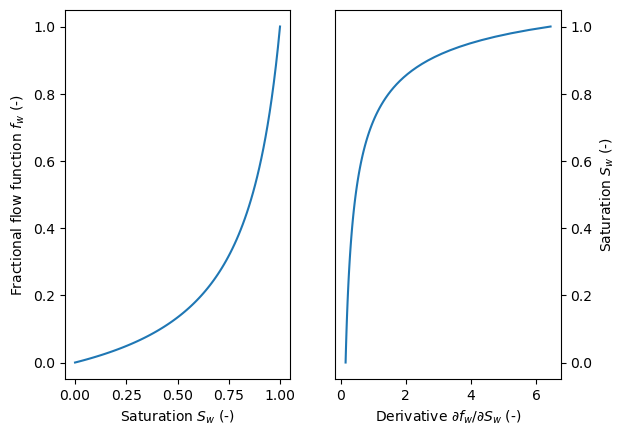

In [4]:
import matplotlib.pyplot as plt
from numpy import linspace

Sw = linspace(0, 1, 100)

# definition of fractional flow function
def fw(Sw):
    krn = 1 - Sw # relative permeability function for nonwetting phase
    krw = Sw # relative permeability function for wetting phase
    muw = 0.00041017 # viscosity of wetting fluid. water
    mun = 6.3636e-05 # viscosity of nonwetting fluid. carbon dioxide

    lambdaw = krw/muw
    lambdan = krn/mun

    return lambdaw / (lambdaw + lambdan)

# Numerical derivative
eps = 1e-8
dfwdx = (fw(Sw+eps) - fw(Sw-eps))/(2*eps) 

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(Sw, fw(Sw))
ax1.set_xlabel("Saturation $S_w$ (-)")
ax1.set_ylabel("Fractional flow function $f_w$ (-)")

ax2.plot(dfwdx, Sw)
ax2.set_xlabel("Derivative $\partial f_w / \partial S_w$ (-)")
ax2.set_ylabel("Saturation $S_w$ (-)")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.show()


Here we see a high flow velocity, when the water saturation is high, and a very low velocity, when the water saturation is low. This indicates, that carbon dioxide can only displace water in a small fraction in the pore space, when capillary pressure and gravity forces are negligible.

## Further Reading
Blunt, M.: [Solutions to the Buckley Leverett equation](https://www.youtube.com/watch?v=a06Cv4YeOwY), Youtube

Leveque, R. J.: Finite Volume Methods for Hyperbolic Problems, Cambridge University Press, 2002 